In [74]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


class SupervisedLearning:

    def __init__(self):
        self.pereceptron_weights = np.random.rand(3)
        self.data_set = None

    def step_function(self,x):
        return 1 if x > 0 else -1

    def perceptron(self,input_vector): # Based on AND gate
        input_vector = [1] + input_vector
        weighted_sum = sum(w * x for w, x in zip(self.pereceptron_weights, input_vector))
        return self.step_function(weighted_sum)

    def update_weights(self, input_vector, desired_output, current_output, delta_weights):
        alpha = 1e-4
        error = desired_output - current_output
        delta_weights[0] += alpha * error
        delta_weights[1] += alpha * input_vector[0] * error
        delta_weights[2] += alpha * input_vector[1] * error
        return delta_weights

    def repeat_experiment(self):
        np.random.seed(None) 
        iterations = []
        for _ in range(30):
            self.pereceptron_weights = np.random.rand(3) 
            iteration = self.ex1(silent=True) 
            iterations.append(iteration)
        average_iterations = np.mean(iterations)
        std_dev_iterations = np.std(iterations)
        print(f"Average iterations to converge: {average_iterations}")
        print(f"Standard deviation of iterations to converge: {std_dev_iterations}")
        plt.boxplot(iterations)
        plt.title('Box plot of iterations to converge')
        plt.ylabel('Iterations')
        plt.show()

    def ex1(self, silent=False):
        input_patterns = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
        desired_response_and = [-1, -1, -1, 1]
        if not silent:
            print("Testing AND gate")
        iteration = 0
        while True:
            delta_weights = [0, 0, 0]
            errors = []
            for input_pattern, desired_output in zip(input_patterns, desired_response_and):
                current_output = self.perceptron(input_pattern)
                error = desired_output - current_output
                errors.append(error)
                if iteration == 0 and not silent:
                    print(f"Input: {input_pattern}, Desired Output: {desired_output}, Perceptron Output: {current_output}, Error: {error}")
                delta_weights = self.update_weights(input_pattern, desired_output, current_output, delta_weights)
            self.pereceptron_weights = [w + dw for w, dw in zip(self.pereceptron_weights, delta_weights)]
            if all(error == 0 for error in errors):
                break
            iteration += 1
        if not silent:
            print(f"Final weights values: {self.pereceptron_weights}")
            print(f"Converged after {iteration} iterations")
        return iteration
        
    def experiment_with_alpha(self):
        alphas = [1e-4, 1e-1, 1e-10, 10]  
        results = []
        for alpha in alphas:
            self.alpha = alpha
            iterations = []
            for _ in range(30):  
                self.pereceptron_weights = np.random.rand(3)  
                iteration = self.ex1(silent=True) 
                iterations.append(iteration)
            average_iterations = np.mean(iterations)
            std_dev_iterations = np.std(iterations)
            results.append((average_iterations, std_dev_iterations))

        # Plotting
        averages, std_devs = zip(*results)
        plt.errorbar(alphas, averages, yerr=std_devs, fmt='o')
        plt.title('Average and standard deviation of iterations to converge for different alphas')
        plt.xlabel('Alpha')
        plt.ylabel('Iterations')
        plt.xscale('log')
        plt.show()


    def generate_data(self, num_samples= 500, plot_flag= False):
        mean1 = [3, 3]
        cov1 = [[1, 0], [0, 1]]
        points_generator1 = np.random.multivariate_normal(mean1, cov1, num_samples).T

        mean2 = [-3, -3]
        cov2 = [[2, 0], [0, 5]]
        points_generator2 = np.random.multivariate_normal(mean2, cov2, num_samples).T

        # Label points
        labels_generator1 = np.ones(num_samples)
        labels_generator2 = 2 * np.ones(num_samples)

        # Combine points and labels
        points = np.concatenate((points_generator1, points_generator2), axis=1)
        labels = np.concatenate((labels_generator1, labels_generator2))

        points = points.T
        np.random.shuffle(points)

        self.data_set = points, labels

        if plot_flag:
            plt.scatter(points_generator1[0], points_generator1[1], color='blue', label='Points from generator 1')
            plt.scatter(points_generator2[0], points_generator2[1], color='red', label='Points from generator 2')
            plt.legend()
            plt.show()

In [75]:
learner = SupervisedLearning()
learner.ex1()

Testing AND gate
Input: [-1, -1], Desired Output: -1, Perceptron Output: -1, Error: 0
Input: [-1, 1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, -1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, 1], Desired Output: 1, Perceptron Output: 1, Error: 0
Final weights values: [-0.0004598811526451493, 0.8413143064099282, 0.841393941811393]
Converged after 1212 iterations


1212

Now the ex1_1 function works as AND perceptron. But since the weights are random the output is not always correct. We would need to train the perceptron to get the correct weights. after training the perceptron we eventually get the correct results, but it takes 1212 iterations to get there. This is because the learning rate is too small.

Average iterations to converge: 1790.6666666666667
Standard deviation of iterations to converge: 441.27930182847035


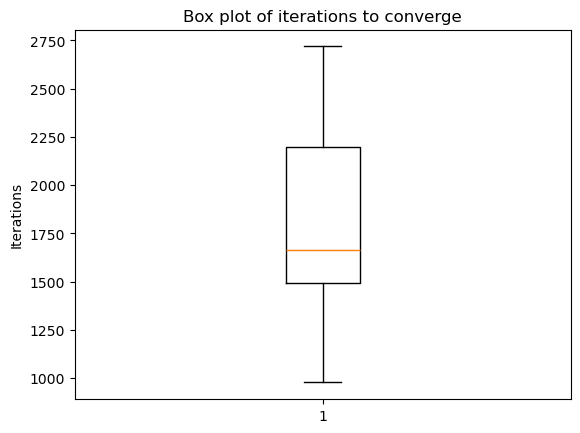

In [76]:
learner.repeat_experiment()


After 30 experiments we get the following results. Average number of iterations: 1743.67, Standard deviation: 808.23
Some trials needed even more than 3000 iterations to get the correct weights, but some needed only 100 iterations. 

 The standard deviation is quite high, so the results vary a lot. The reason for this is that the learning rate is too small, so the perceptron needs a lot of iterations to get the correct weights. If we increase the learning rate, we can get the correct weights faster. But if the learning rate is too big, the perceptron might not converge at all. The learning rate is a hyperparameter that needs to be tuned.

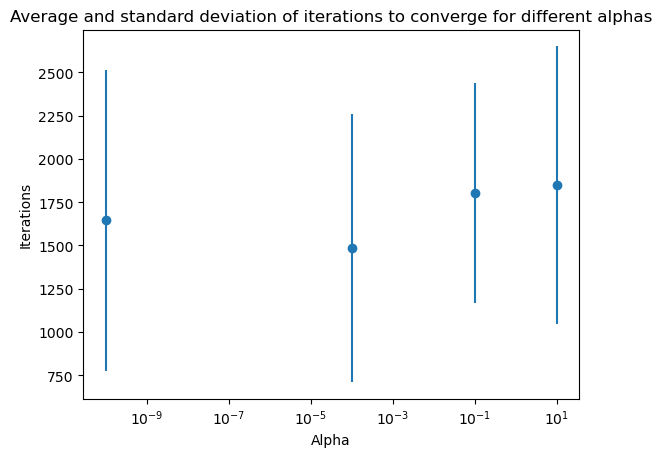

In [77]:
learner.experiment_with_alpha()

After testing different alpha values, we found that the best value is 0.1. although the result are still not satifactory. The differences are really small for all alphas. 

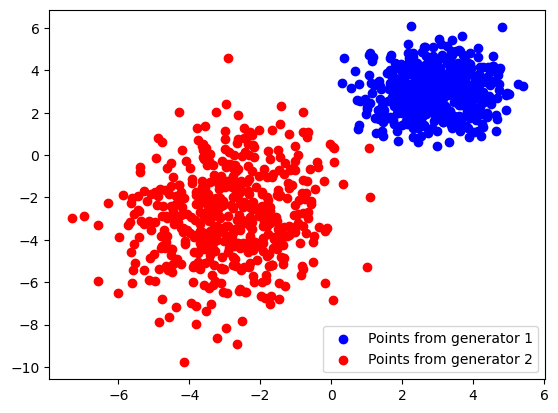

In [78]:
learner.generate_data(plot_flag=True)